In [5]:
import pandas as pd


df = pd.read_csv("../data/raw_analyst_ratings.csv")

In [6]:
df['headline_length'] = df['headline'].astype(str).str.len()
df['headline_length'].describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

In [7]:
df.loc[df['headline_length'].idxmax(), 'headline']

'JinkoSolar Tiger Pro Series Receives World\'s First IEC 61701 Ed. 3 (FDIS) Certification for Salt Mist Corrosion Standards JinkoSolar Holding Co., Ltd. (the "Company," or "JinkoSolar") (NYSE:JKS), one of the largest and most innovative solar module manufacturers in the world, today announced that its innovative Tiger Pro Series of high-efficiency modules received the world\'s first IEC 61701 Ed. 3 (FDIS) certification for salt mist corrosion test issued by TÜV Nord AG, an independent provider of technical ser'

In [8]:
df.loc[df['headline_length'].idxmin(), 'headline']

'SPY'

In [9]:
publisher_count = df['publisher'].value_counts()
publisher_count.count()

np.int64(1034)

In [10]:
avg_articles = publisher_count.mean()
avg_articles

np.float64(1361.0522243713733)

In [23]:
active_publishers = publisher_count[publisher_count > 1361.05]
active_publishers.count()
active_publishers


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Bud Fox                1496
Abe Raymond            1464
Fred Fuld              1456
Matthew McCall         1448
Taylor Cox             1414
Name: count, Length: 77, dtype: int64

In [12]:
nonactive_publishers = publisher_count[publisher_count <= 1361.05]
nonactive_publishers.count()

np.int64(957)

In [20]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.day_name()
df['day'] = df['date'].dt.date
df['hour'] = df['date'].dt.hour
df['hour'].value_counts().sort_index()


hour
0.0       67
1.0       14
2.0       57
3.0       93
4.0     1469
5.0     1829
6.0     2476
7.0     5033
8.0     5527
9.0     5965
10.0    7669
11.0    5701
12.0    5732
13.0    2710
14.0    2075
15.0    1612
16.0    3939
17.0    2800
18.0     704
19.0     227
20.0     131
21.0      82
22.0      48
23.0      27
Name: count, dtype: int64

<Axes: title={'center': 'Articles Published per Hour'}, xlabel='hour'>

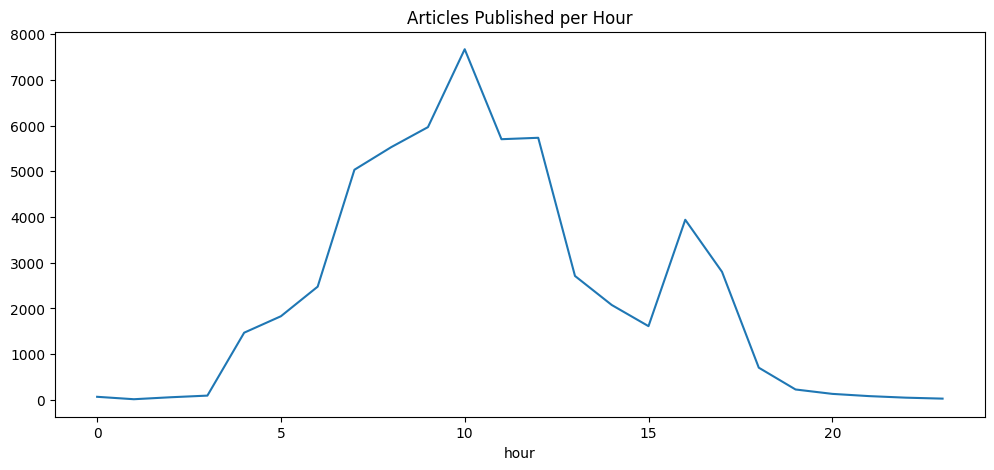

In [22]:
hourly = df.groupby('hour').size()
hourly.plot(figsize=(12,5), title="Articles Published per Hour")

<Axes: title={'center': 'Articles Published per Day'}, xlabel='day'>

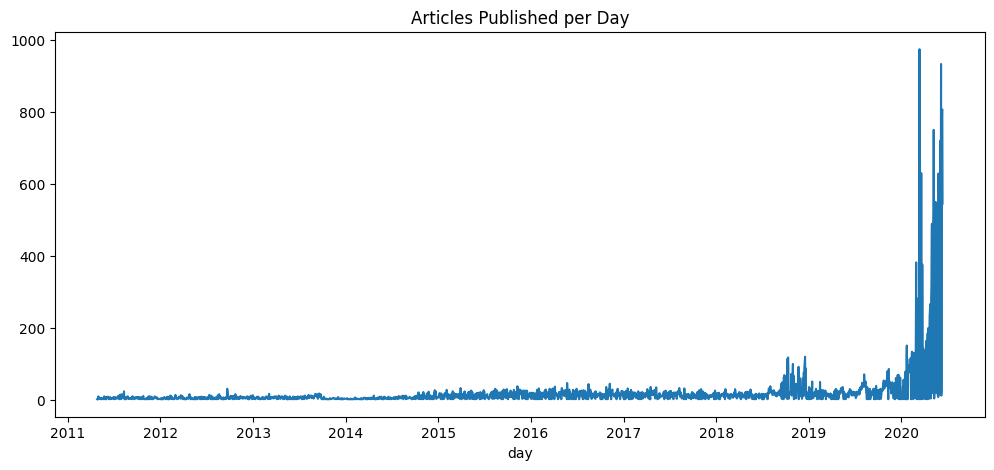

In [14]:
daily = df.groupby('day').size()
daily.plot(figsize=(12,5), title="Articles Published per Day")

<Axes: title={'center': 'Articles Published by Day of the Week'}, xlabel='week'>

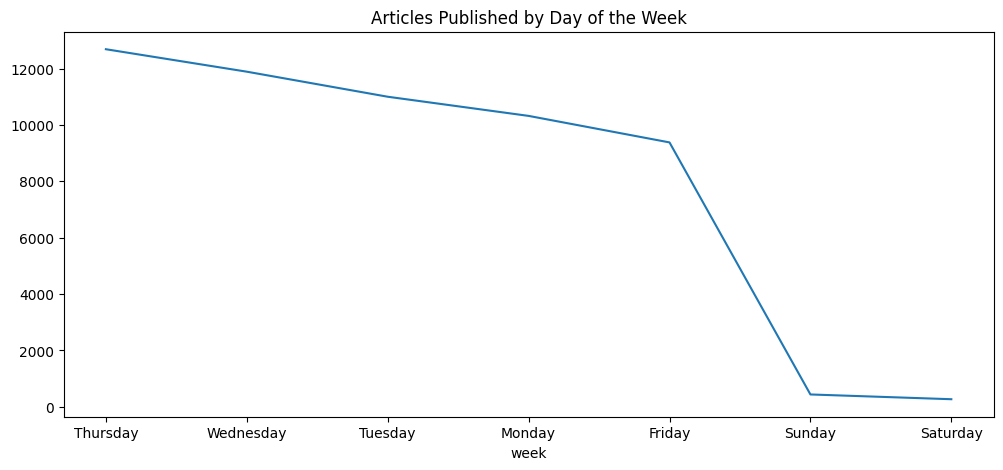

In [15]:
days = df['week'].value_counts()
days.plot(figsize=(12,5), title="Articles Published by Day of the Week")

<Axes: title={'center': 'Articles Published per Month'}, xlabel='year,month'>

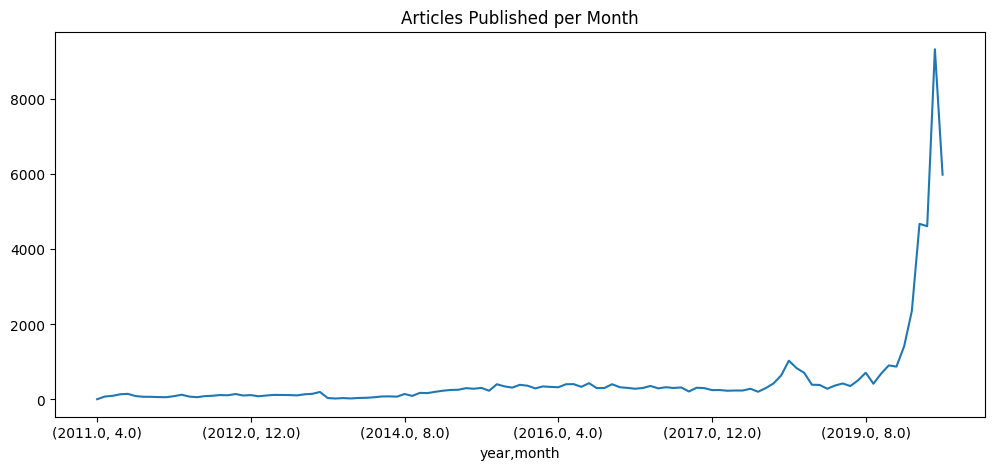

In [16]:
monthly= df.groupby(['year', 'month']).size()
monthly.plot(figsize=(12,5), title="Articles Published per Month")

<Axes: title={'center': 'Articles Published per Year'}, xlabel='year'>

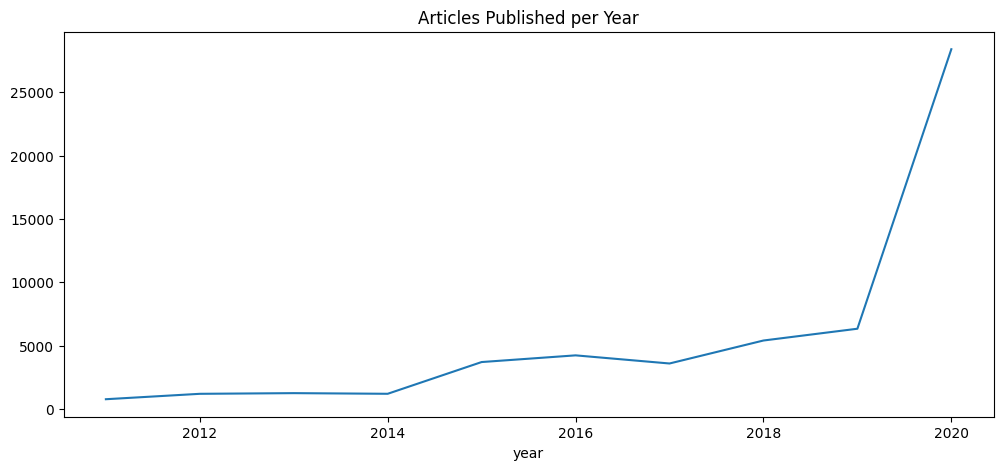

In [17]:
yearly = df.groupby('year').size()
yearly.plot(figsize=(12,5), title="Articles Published per Year")

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

vectorizer = CountVectorizer(stop_words='english')
word_matrix = vectorizer.fit_transform(df['headline'].astype(str))

word_counts = word_matrix.sum(axis=0).A1
words = vectorizer.get_feature_names_out()

freq_df = pd.DataFrame({'word': words, 'count': word_counts})

mean = freq_df['count'].mean()
std = freq_df['count'].std()

freq_df['z_score'] = (freq_df['count'] - mean) / std

common_words = freq_df[freq_df['z_score'] > 2]
common_words.sort_values('z_score', ascending=False).head(10)


,word,count,z_score
104259,vs,162099,95.963082
93662,stocks,161776,95.771725
40857,est,140604,83.228648
40388,eps,128897,76.292988
63981,market,120558,71.352655
89240,shares,114313,67.652886
83568,reports,108710,64.333461
101800,update,91723,54.269733
37999,earnings,87399,51.708035
86676,sales,79645,47.114278


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2))
word_matrix = vectorizer.fit_transform(df['headline'].astype(str))

word_counts = word_matrix.sum(axis=0).A1
words = vectorizer.get_feature_names_out()

freq_df = pd.DataFrame({'word': words, 'count': word_counts})

mean = freq_df['count'].mean()
std = freq_df['count'].std()

freq_df['z_score'] = (freq_df['count'] - mean) / std

common_words = freq_df[freq_df['z_score'] > 2]
common_words.sort_values('z_score', ascending=False).head(20)



,word,count,z_score
146342,52 week,51006,388.328090
1355918,price target,47274,359.911601
1667523,stocks moving,40044,304.860363
1142809,mid day,37324,284.149524
1111579,market update,33101,251.994423
694204,earnings scheduled,32055,244.029888
968349,initiates coverage,28993,220.714965
1344224,pre market,28393,216.146398
1411047,raises pt,27213,207.161548
533614,companies trading,23170,176.377018


In [30]:
df['domain'] = df['publisher'].str.split('@').str[1]
df_valid_domain = df[df['domain'].notna()]
domain_cnt = df_valid_domain['domain'].value_counts().reset_index()
domain_cnt.columns = ['domain', 'article_count']

domain_cnt.head(20)

,domain,article_count
0,benzinga.com,7937
1,gmail.com,139
2,andyswan.com,5
3,investdiva.com,2
4,tothetick.com,2
5,eosdetroit.io,1
6,forextraininggroup.com,1
7,stockmetrix.net,1
